In [1]:
import pandas as pd
import requests
from conda_forge_tick.utils import loads
from collections import Counter
import matplotlib.pyplot as plt

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/regro/cf-graph-countyfair/master/audits/depfinder_accuracy.csv')

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df['time'] = pd.to_datetime(df['time'].values, unit='s')

In [4]:
df.tail()

,time,accurate,cf_over_specified,cf_under_specified,cf_over_and_under_specified,errored,definder_version,audit_creation_version
242,2020-12-01 09:10:19.840078592,2920,798,1854,983,276,2.7.0,4
243,2020-12-01 10:10:06.961130142,2921,798,1854,983,276,2.7.0,4
244,2020-12-01 11:08:15.784851551,2921,798,1854,983,276,2.7.0,4
245,2020-12-01 12:10:21.701864958,2921,798,1854,983,276,2.7.0,4
246,2020-12-01 13:08:23.680642605,2921,798,1854,983,276,2.7.0,4


In [5]:
df = df.set_index('time').drop(columns=['audit_creation_version', 'definder_version'])

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df2 = df.copy().div(df.sum(axis=1), axis=0) * 100

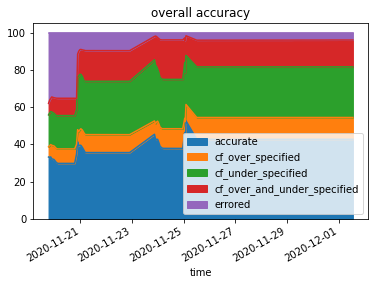

In [7]:
ax = df2.plot.area(title='overall accuracy')

In [8]:
df2.tail()

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accurate,cf_over_specified,cf_under_specified,cf_over_and_under_specified,errored
time,,,,,
2020-12-01 09:10:19.840078592,42.746304,11.682038,27.140975,14.390280,4.040404
2020-12-01 10:10:06.961130142,42.754684,11.680328,27.137002,14.388173,4.039813
2020-12-01 11:08:15.784851551,42.754684,11.680328,27.137002,14.388173,4.039813
2020-12-01 12:10:21.701864958,42.754684,11.680328,27.137002,14.388173,4.039813
2020-12-01 13:08:23.680642605,42.754684,11.680328,27.137002,14.388173,4.039813


In [9]:
audit = loads(requests.get('https://raw.githubusercontent.com/regro/cf-graph-countyfair/master/audits/depfinder/_net_audit.json').text)

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
len(audit)

6832

In [11]:
df_minus_cf = {k: v['df_minus_cf'] for k, v in audit.items() if v and 'df_minus_cf' in v}

In [12]:
df_minus_cf_counts = [len(v) for v in df_minus_cf.values()]
sum(df_minus_cf_counts), len(df_minus_cf)

(7698, 2837)

Text(0.5, 1.0, 'Number of feedstock missing N pkgs')

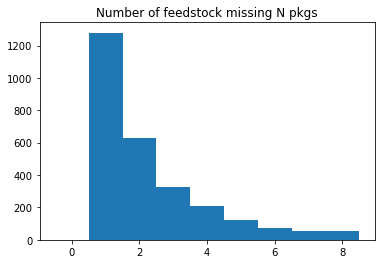

In [13]:
plt.hist(df_minus_cf_counts, bins=range(10), align='left')
plt.title('Number of feedstock missing N pkgs')

In [14]:
df_minus_cf_pkgs = [vv for v in df_minus_cf.values() for vv in v]

In [15]:
# the most common pkgs that are missing

In [16]:
Counter(df_minus_cf_pkgs).most_common(10)

[('numpy', 433),
 ('pytest', 260),
 ('six', 232),
 ('matplotlib', 230),
 ('requests', 168),
 ('scipy', 164),
 ('pandas', 162),
 ('pyyaml', 128),
 ('ipython', 118),
 ('traitlets', 117)]

In [17]:
cf_minus_df = {k: v['cf_minus_df'] for k, v in audit.items() if v and 'cf_minus_df' in v}

In [18]:
cf_minus_df_counts = [len(v) for v in cf_minus_df.values()]
sum(cf_minus_df_counts)

3579

Text(0.5, 1.0, 'Number of feedstock with too many N pkgs')

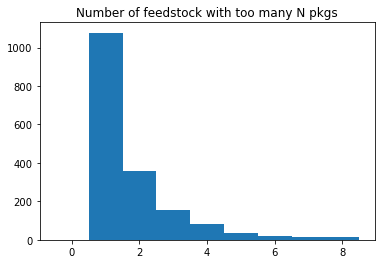

In [19]:
plt.hist(cf_minus_df_counts, bins=range(10), align='left')
plt.title('Number of feedstock with too many N pkgs')

In [20]:
cf_minus_df_pkgs = [vv for v in cf_minus_df.values() for vv in v]

In [21]:
# the most common pkgs too many

In [22]:
Counter(cf_minus_df_pkgs).most_common(10)

[('six', 113),
 ('future', 80),
 ('numpy', 76),
 ('scipy', 74),
 ('pytest', 57),
 ('requests', 46),
 ('matplotlib-base', 43),
 ('boost', 36),
 ('netcdf4', 35),
 ('pillow', 35)]

In [23]:
single_df_minus_cf = {k: next(iter(v)) for k, v in df_minus_cf.items() if len(v) == 1}

In [24]:
# the most common pkgs that are the only pkg too few

In [25]:
Counter(single_df_minus_cf.values()).most_common(10)

[('numpy', 111),
 ('pytest', 93),
 ('six', 52),
 ('cython', 43),
 ('matplotlib', 31),
 ('traitlets', 30),
 ('werkzeug', 25),
 ('django', 24),
 ('docutils', 23),
 ('py', 23)]

In [26]:
single_cf_minus_df = {k: next(iter(v)) for k, v in cf_minus_df.items() if len(v) == 1}

In [27]:
# the most common pkgs that are the only pkg too many

In [28]:
Counter(single_cf_minus_df.values()).most_common(10)

[('six', 71),
 ('future', 45),
 ('scipy', 32),
 ('numpy', 29),
 ('requests', 20),
 ('boost', 20),
 ('pytest', 17),
 ('matplotlib-base', 17),
 ('pyqt', 13),
 ('lxml', 13)]

In [29]:
# the most common pkgs that are the only 2 pkgs too many

In [30]:
double_df_minus_cf = [vv for k, v in df_minus_cf.items() if len(v) == 2 for vv in v]

In [31]:
Counter(double_df_minus_cf).most_common(10)

[('numpy', 96),
 ('pytest', 58),
 ('six', 51),
 ('matplotlib', 48),
 ('requests', 37),
 ('scipy', 31),
 ('pyyaml', 29),
 ('traitlets', 29),
 ('ipython', 29),
 ('tornado', 23)]

In [32]:
audits2 = {}
for k, v in audit.items():
    if v:
        audits2[k] = {}
        for kk, vv in v.items():
            if kk in ['cf_minus_df', 'df_minus_cf']:
                z = vv - {'matplotlib', 'matplotlib-base', 'pytest'}
                _ = {kk: z}
                if z:
                    audits2[k].update(_)
    else:
        audits2[k] = False

In [33]:
df_minus_cf = {k: v['df_minus_cf'] for k, v in audits2.items() if v and 'df_minus_cf' in v}

In [34]:
df_minus_cf_counts = [len(v) for v in df_minus_cf.values()]
sum(df_minus_cf_counts), len(df_minus_cf)

(7208, 2712)

Text(0.5, 1.0, 'Number of feedstock missing N pkgs')

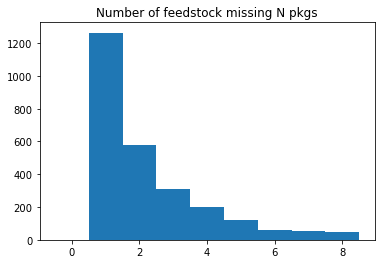

In [35]:
plt.hist(df_minus_cf_counts, bins=range(10), align='left')
plt.title('Number of feedstock missing N pkgs')